# Week 4 - Supervised Learning: Evaluation and diagnostics

Example with Planet habitability

<hr style="border:2px solid gray">

## Index: <a id='index'></a>
1. [Research-level datasets](#dataset)
2. [Model evaluation](#evaluation)
3. [Cross validation](#crossvalidation)
4. [Learning curves](#learningcurves)


<hr style="border:2px solid gray">

## Research-level datasets: [^](#index) <a id='index'></a>


Let's remind ourselves of the steps of a machine learning project.
1. **Problem formulation:** Define the problem that you want to solve. What
are you trying to predict or classify? What data do you have available?
2. **Data collection:** 
3. **Data preparation and feature engineering:** 
5. **Model selection and training:** 
7. **Model evaluation:** 

### STEP 1: Problem formulation


 - #### We aim to build a supervised classifier that predicts whether an exoplanet is habitable.
 - #### Data available consists of a research‑scale exoplanet catalog with many columns.
 - #### Four predictive features: S_MASS (stellar mass), P_DISTANCE (planet mean orbital distance in AU), P_PERIOD (orbital period in days), and P_FLUX (mean stellar flux in Earth units)
 - #### one target P_HABITABLE

Before we start you will want to run all of these module imports!

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors



### STEP 2: Data collection
In the second step, we collect the data that we need to train our model. In this case we use again the [Habitable Worlds Catalogue]('https://phl.upr.edu/hwc'). It lists up to potentially habitable worlds in a list of over five thousand known exoplanets, putting together information gathered by several observatories, including the Kepler and K2 missions and the ongoing Transiting Exoplanet Survey Satellite.

Just like you did last week, use the `read_csv` function from the `panda` module to read in the `hwc.csv` file into a panda DataFrame.

In [2]:
pd_exo=pd.read_csv(r'hwc.csv')

Take a Quick Look at the Data Structure with `.head()`, `describe()`, and `info()`

In [3]:
pd_exo.head()

,P_NAME,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,251.084120,-123.952920,413.176400,13.90040,0.00000,0.00000,2020,2020,0.000000,...,0.000046,0.000000,0,0,Cold,0,0.146639,Scorpius,Sco,Scorpion
1,Kepler-276 c,16.527056,-3.496108,4.449592,2.90339,-0.28025,1.26673,2013,2014,31.884000,...,2.097783,0.316980,0,0,Hot,0,0.271883,Cygnus,Cyg,Swan
2,Kepler-829 b,5.085248,0.000000,0.000000,2.10748,-0.17936,0.43719,2016,2016,6.883376,...,1.756317,0.459559,0,0,Hot,0,0.254888,Lyra,Lyr,Lyre
3,K2-283 b,12.172812,0.000000,0.000000,3.51994,-0.15694,0.15694,2018,2018,1.921036,...,0.568374,0.000000,0,0,Hot,0,0.193908,Pisces,Psc,Fishes
4,Kepler-477 b,4.926334,0.000000,0.000000,2.07385,-0.12331,0.17936,2016,2016,11.119907,...,0.768502,0.386150,0,0,Hot,0,0.276524,Lyra,Lyr,Lyre


In [4]:
pd_exo.describe()

/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2

,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
count,5429.000000,5429.000000,5429.000000,5566.000000,5566.000000,5566.000000,5566.000000,5566.000000,5.566000e+03,5.566000e+03,...,5566.000000,5566.000000,5566.000000,5566.000000,5.566000e+03,5566.000000,5566.000000,5566.000000,5566.000000,5263.000000
mean,435.512073,-56.044664,74.822279,5.673366,-0.291506,0.367247,2016.143909,2016.332734,7.684540e+04,-1.964066e+04,...,2.297740,1.232818,2.297740,3.567121,9.798415e+34,0.336715,0.060187,0.043478,0.025332,0.257500
std,2371.324125,243.280220,367.353833,5.313856,0.816212,1.320016,4.504200,4.446826,5.390851e+06,1.342383e+06,...,4.503969,2.346731,4.503969,6.620466,5.168606e+36,0.189695,0.237854,0.203949,0.210859,0.134995
min,0.000000,-4767.420000,0.000000,0.000000,-32.509000,0.000000,1992.000000,1992.000000,0.000000e+00,-1.000000e+08,...,0.001910,0.000911,0.001910,0.002434,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000019
25%,3.941067,-14.937916,0.000000,1.771180,-0.325090,0.000000,2014.000000,2014.000000,4.016440e+00,-9.675000e-04,...,1.084775,0.581461,1.084775,1.650019,4.140582e-01,0.278981,0.000000,0.000000,0.000000,0.178469
50%,8.498721,0.000000,0.000000,2.768870,-0.123310,0.134520,2016.000000,2016.000000,1.059206e+01,-5.780500e-05,...,1.624331,0.888340,1.624331,2.605336,1.282764e+00,0.432534,0.000000,0.000000,0.000000,0.267601
75%,155.735720,0.000000,15.891400,11.770500,0.000000,0.414770,2020.000000,2020.000000,3.837136e+01,-5.245000e-06,...,2.328600,1.278994,2.328600,3.813851,2.504773e+00,0.463091,0.000000,0.000000,0.000000,0.302495
max,89627.496000,0.000000,7945.700000,77.349000,0.000000,68.919080,2023.000000,2023.000000,4.020000e+08,0.000000e+00,...,120.348830,67.331558,120.348830,214.468620,2.726899e+38,1.003328,1.000000,1.000000,2.000000,0.950567


In [5]:
pd_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Columns: 103 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(85), int64(5), object(13)
memory usage: 4.4+ MB


This dataset has a lot of features! For the purpose of this exercise, it is useful to just focus on the following interesting features:

S_MASS - star mass (solar units)

P_DISTANCE - planet mean distance from the star (AU)

P_PERIOD - planet period (days)

P_FLUX - planet mean stellar flux (earth units)

Define a new dataset with just these three features and the labels `P_HABITABLE` and verify using `head()` or `describe()` that it worked.

In [6]:
pd_exo_int = pd_exo[["S_MASS", "P_DISTANCE", "P_PERIOD","P_FLUX","P_HABITABLE"]]

In [7]:
pd_exo_int.head()

,S_MASS,P_DISTANCE,P_PERIOD,P_FLUX,P_HABITABLE
0,0.10,3.4000,0.000000,0.086505,0
1,1.10,0.1994,31.884000,20.490365,0
2,0.98,0.0678,6.883376,238.528680,0
3,0.89,0.0291,1.921036,353.357260,0
4,0.87,0.0911,11.119907,51.163853,0


In [8]:
pd_exo_int.tail()

,S_MASS,P_DISTANCE,P_PERIOD,P_FLUX,P_HABITABLE
5561,1.02,0.053300,4.458149,348.775190,0
5562,0.39,2.440000,0.000000,0.167966,0
5563,0.84,0.000000,3.770150,inf,0
5564,0.53,1.900000,0.000000,0.277008,0
5565,1.21,5.205792,3999.000000,0.123796,0


In [9]:
pd_exo_int.describe()

/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,S_MASS,P_DISTANCE,P_PERIOD,P_FLUX,P_HABITABLE
count,5566.000000,5566.000000,5.566000e+03,5.566000e+03,5566.000000
mean,0.950715,6.403664,7.684540e+04,inf,0.025332
std,0.424245,131.139494,5.390851e+06,NaN,0.210859
min,0.000000,0.000000,0.000000e+00,3.289901e-10,0.000000
25%,0.790000,0.048802,4.016440e+00,8.448408e+00,0.000000
50%,0.950000,0.096132,1.059206e+01,6.945587e+01,0.000000
75%,1.090000,0.269252,3.837136e+01,3.707334e+02,0.000000
max,10.940000,7506.000000,4.020000e+08,inf,2.000000


In [10]:
pd_exo_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S_MASS       5566 non-null   float64
 1   P_DISTANCE   5566 non-null   float64
 2   P_PERIOD     5566 non-null   float64
 3   P_FLUX       5566 non-null   float64
 4   P_HABITABLE  5566 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 217.6 KB


### STEP 3 Data preparation and Feature Engineering

Let's check the `P_HABITABLE` entries. You can use the `groupby` function of `panda` to group the dataframe by the `P_HABITABLE` feature. If you are not sure how to use it, check it out with `help` first.

In [11]:
pd_exo_int.groupby("P_HABITABLE").size()


P_HABITABLE
0    5480
1      31
2      55
dtype: int64

The three numbers mean:
```
0 --> not habitable
1 --> conservative
2 --> optimistic
```
It would be more useful for us just to have a binary option, so we should transform our dataset accordingly.

Let's start with creating a new dataset without the `P_HABITABLE` feature (hint: use `drop` from `panda`):

In [12]:
pd_exo_bin = pd_exo_int.drop("P_HABITABLE", axis = "columns")


Now let's add a column called `P_HABITABLE` to our new data frame, with:

```
0 --> not habitable
1 --> habitable
```

Now let's add a feature to our dataframe that is the `logical or` of the 1 and 2 `P_HABITABLE` original values (hint: use `logical_or` from `numpy`) 

NB `logical_or` will return True and False values, so you will also need to convert the column to integers. 
Once you are confident that you have performed the two operations correctly, check that `pd_exo_bin.head()` gives you the result you expect.

In [13]:
pd_exo_bin["P_HABITABLE"] = np.logical_or(
    pd_exo_int["P_HABITABLE"] == 1,
    pd_exo_int["P_HABITABLE"] == 2
).astype(int)

print(pd_exo_bin.tail())
print(pd_exo_bin["P_HABITABLE"].value_counts())


      S_MASS  P_DISTANCE     P_PERIOD      P_FLUX  P_HABITABLE
5561    1.02    0.053300     4.458149  348.775190            0
5562    0.39    2.440000     0.000000    0.167966            0
5563    0.84    0.000000     3.770150         inf            0
5564    0.53    1.900000     0.000000    0.277008            0
5565    1.21    5.205792  3999.000000    0.123796            0
P_HABITABLE
0    5480
1      86
Name: count, dtype: int64


Using the `numpy` functions `isnan` and `isinf`, check how many instances of NaN (not a number) and infinity are in the dataset.

In [14]:
### Counting missing data...
countInf = np.isnan(pd_exo_bin).sum()
countNaN = np.isinf(pd_exo_bin).sum()
print("There are {} instances of NaN in the dataset".format(countNaN))
print("There are {} instances of Infinity in the dataset".format(countInf))


There are S_MASS           0
P_DISTANCE       0
P_PERIOD         0
P_FLUX         303
P_HABITABLE      0
dtype: int64 instances of NaN in the dataset
There are S_MASS         0
P_DISTANCE     0
P_PERIOD       0
P_FLUX         0
P_HABITABLE    0
dtype: int64 instances of Infinity in the dataset


As we saw during the lecture, there are different ways of dealing with missing values. In our case we will choose a shortcut and replace all infinities with NaN, and then drop all of the instances of NaN in the dataset.

In [15]:
pd_exo_bin.replace([np.inf, -np.inf], np.nan, inplace=True)
pd_exo_bin.dropna(inplace=True)
final_features = pd_exo_bin
final_features.shape

(5263, 5)

The output from `final_features.shape` should give you `(5263, 5)`.

Now it's time to also define our targets as the `P_HABITABLE` column in the dataframe, and drop the `P_HABITABLE` feature from our dataframe.

In [16]:
targets = pd_exo_bin["P_HABITABLE"]
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: P_HABITABLE, dtype: int64

In [17]:
final_features = pd_exo_bin.drop("P_HABITABLE", axis = "columns")
final_features.head()

,S_MASS,P_DISTANCE,P_PERIOD,P_FLUX
0,0.10,3.4000,0.000000,0.086505
1,1.10,0.1994,31.884000,20.490365
2,0.98,0.0678,6.883376,238.528680
3,0.89,0.0291,1.921036,353.357260
4,0.87,0.0911,11.119907,51.163853


**Number 1 rule of science: know your data!** 
Plot 4 histograms with the final features we chose. Use `describe` to inspect the dataset. Are there any outliers?

In [18]:
final_features.describe()

,S_MASS,P_DISTANCE,P_PERIOD,P_FLUX
count,5263.000000,5263.000000,5.263000e+03,5.263000e+03
mean,0.954687,6.772334,8.126074e+04,5.508274e+02
std,0.431827,134.853074,5.543856e+06,1.040522e+04
min,0.000000,0.004408,0.000000e+00,3.289901e-10
25%,0.790000,0.053465,4.021021e+00,7.278999e+00
50%,0.950000,0.104000,1.066669e+01,5.841226e+01
75%,1.100000,0.302700,4.010566e+01,2.757607e+02
max,10.940000,7506.000000,4.020000e+08,6.363521e+05


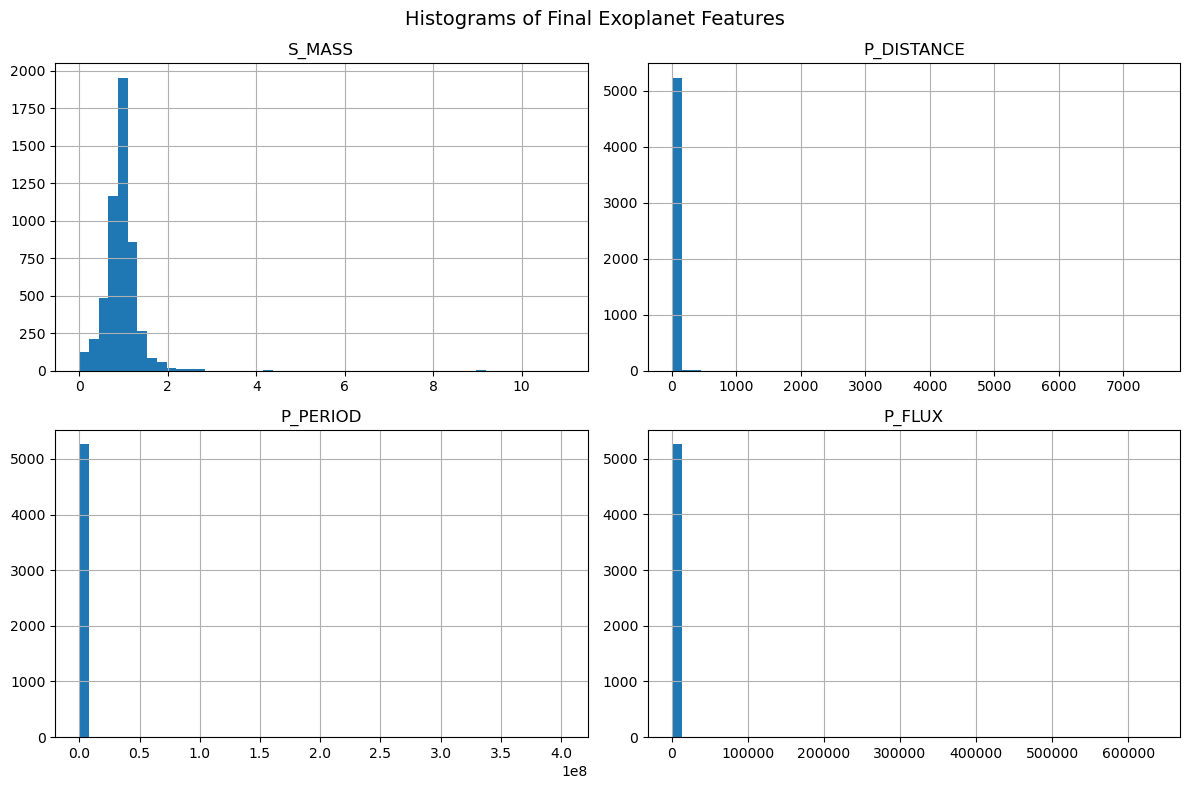

In [19]:
final_features.hist(
    bins=50,                
    figsize=(12, 8),        
    layout=(2, 2),          
    xlabelsize=10,
    ylabelsize=10
)

plt.suptitle("Histograms of Final Exoplanet Features", fontsize=14)
plt.tight_layout()
plt.show()

It is clear that are some big outliers in this dataset that may end up biasing our result. One way to deal with them is to remove all outliers that are more than 5 standard deviations away from the mean.

The `stats` `zscore` method gives you a way to evaluate how many sigmas away is a value from the mean. Use it to filter out instances that have features that are more than 5 sigmas away. Then verify using `describe` that the datasets have less outlieers

In [20]:
z_score = np.abs(stats.zscore(final_features))
final_features = final_features[(z_score<5).all(axis=1)]


In [21]:
final_features.describe()


,S_MASS,P_DISTANCE,P_PERIOD,P_FLUX
count,5239.000000,5239.000000,5.239000e+03,5.239000e+03
mean,0.943590,2.087982,4.557972e+03,3.558403e+02
std,0.332536,21.670356,1.700968e+05,1.265781e+03
min,0.000000,0.004408,0.000000e+00,8.065555e-09
25%,0.790000,0.053250,4.038803e+00,7.351126e+00
50%,0.950000,0.103614,1.067607e+01,5.896130e+01
75%,1.100000,0.296400,3.996883e+01,2.759458e+02
max,2.820000,670.000000,8.040000e+06,5.174612e+04


We will need to redefine our targets using the new indices. Run the cell below.

In [22]:
targets = targets[final_features.index]

Reset the index of both final_features and targets

In [23]:
final_features = final_features.reset_index(drop=True)
targets = targets.reset_index(drop=True)

<div style="background-color:#C2F5DD">

## Exercise 1
1. Size: What was the size of the data set before and after the cleaning up procedure?
2. Missing data: how did you deal with them? what could have been a better way of dealing with them?
3. Outliers: how did we deal with them?
4. Balance: check how many habitable planets are in the dataset and if it is a similar number to the non-habitable ones
5. Intuition: which model is it going to work best, decision trees or kNN? why?
6. Do the habitable and non-habitable planets have similar statical features? (hint: use `concat` to put together the `final_features` and `targets` dataframes, and `describe` using the `percintiles=[]` option and `groupby` `P_HABITABLE`)

1. Before cleaning, the dataset had 5566 rows and 103 columns (~4.4 MB). After removing NaNs, infinities, and extreme outliers, it was reduced to 4999 rows and 4 columns (~156 KB), losing about 10% of the data for a cleaner, more manageable dataset.


2. We managed missing data by removing all rows containing NaN values with `dropna()`, which purified the rest of the dataset and left it complete. The method is simple and effective but resulted in the loss of about 10% of data, which may have been significant information. A better option would have been to utilize pandas' `fillna()` method to fill in missing values with forward or backward fill based on neighboring data or by replacing NaNs with the mean or median of the column. This would put less data in jeopardy while still being able to properly address missing values for analysis or modeling.


3. We treated outliers by the z-score method. We calculated for each feature in our dataset how many standard deviations any one value was from the mean, then removed every row in which the z-score exceeded 5 for any feature. This effectively removed extreme values which were way beyond the normal range, such as monstrously large stars or planets with extremely long periods or distances. In this process, we reduced the skewness of the data, lessened the most extreme values, and compressed the dataset and balanced it so that such extreme outliers do not skew analyses or machine learning algorithms.


4. There are 5480 uninhabitable planets (P_HABITABLE = 0) and 86 habitable planets (P_HABITABLE = 1) in the data. This shows that the figures are not even close to being alike — the data is highly imbalanced, with habitable planets making up a very low proportion of the total. This type of imbalance can bias analyses or machine learning models to predict the dominant class unless special methods are taken to counteract it.


5. Based on the characteristics of the exoplanet dataset—non-uniform classes (far fewer habitable ones than non-habitable ones), biased features, and outlier extremes—**Decision Trees stand a better chance of doing better than k-Nearest Neighbors (kNN)**. Decision Trees are resistant to outliers and have no problem with biased and non-linear relationships in features since they are founded on splitting along feature boundaries, not along distances. On the other hand, kNN is scale and outlier-sensitive in that outliers will overrule the distance computation and swamp predictions as the majority class. Therefore, Decision Trees would be better suited to learn the patterns of the minority class (habitable planets) without being swamped by extreme or imbalanced data.

In [24]:
data = pd.concat([final_features, targets.reset_index(drop=True)], axis = 1)
grouped_stats = data.groupby('P_HABITABLE').describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
print(grouped_stats)

             S_MASS                                                            \
              count      mean       std   min     25%   50%   75%   90%   95%   
P_HABITABLE                                                                     
0            5153.0  0.952806  0.325999  0.00  0.8000  0.95  1.10  1.29  1.46   
1              86.0  0.391395  0.243181  0.02  0.1925  0.34  0.54  0.74  0.85   

                     ...      P_FLUX                                       \
                99%  ...        mean          std           min       25%   
P_HABITABLE          ...                                                    
0            1.9896  ...  361.765698  1275.463782  8.065555e-09  8.423209   
1            0.9805  ...    0.799080     0.400187  2.500000e-01  0.410774   

                                                                          \
                   50%         75%         90%          95%          99%   
P_HABITABLE                                             

### STEP 4: Model selection and training

Use the cell below to define the train and test sets, we use `random_state=2` for reproducibility.

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(final_features,targets,random_state=2)

In [26]:
Xtrain.shape, Xtest.shape

((3929, 4), (1310, 4))

<hr style="border:2px solid gray">

## STEP 5: Model evaluation [^](#index) <a id='evaluation'></a>

<div style="background-color:#C2F5DD">

## Exercise 2
1. Plot a scatter graph of the train and test set like you did last week.
2. Train a `DecisionTreeClassifier` with `random_state=3`.
3. Display the graph of the decision tree and count how many nodes it has. (hint: you can use `node_count` from the tree option)
4. Calculate the `accuracy_score`, `precision_score`, and `recall_score` for the train and test set. Write a comment on the performance of the classifier.
5. Compare the test set metrics to those you would find with 3 dummy classifiers: one that assigns everything to the habitable class, one that assigns everything to the non-habitable class, and one that is alternating 0s and 1s.
6. Display the 4 confusion matrices from the 3 dummy classifier and our decision tree one.
7. Which of the classifier performs better? Which has the best accuracy? best precision? best recall? Why? Justify each answer.
8. Plot the ROC curve. Comment on the result

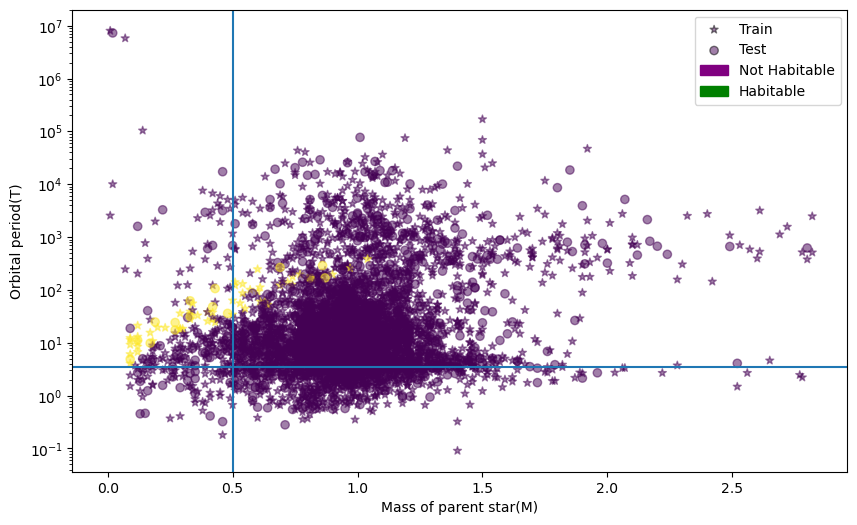

In [27]:

plt.figure(figsize=(10,6))
cmap = colors.ListedColormap(['purple', 'green'])

plt.scatter(Xtrain['S_MASS'],Xtrain['P_PERIOD'],marker ='*', alpha=0.5, label='Train', c=ytrain)
plt.scatter(Xtest['S_MASS'],Xtest['P_PERIOD'],marker ='o', alpha=0.5, label='Test', c=ytest)
plt.xlabel('Mass of parent star(M)')
plt.ylabel('Orbital period(T)')
plt.yscale('log')



purplepatch = mpatches.Patch(color='purple', label='Not Habitable')
greenpatch = mpatches.Patch(color='green', label='Habitable')

ax = plt.gca()
leg = ax.legend()                                                                                                                                                                                                    
leg = ax.get_legend()
leg.legend_handles[0].set_color('k')
leg.legend_handles[1].set_color('k')
plt.legend(handles=[leg.legend_handles[0],leg.legend_handles[1], purplepatch, greenpatch])
plt.axvline(0.5)
plt.axhline(3.5)



In [28]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=3)

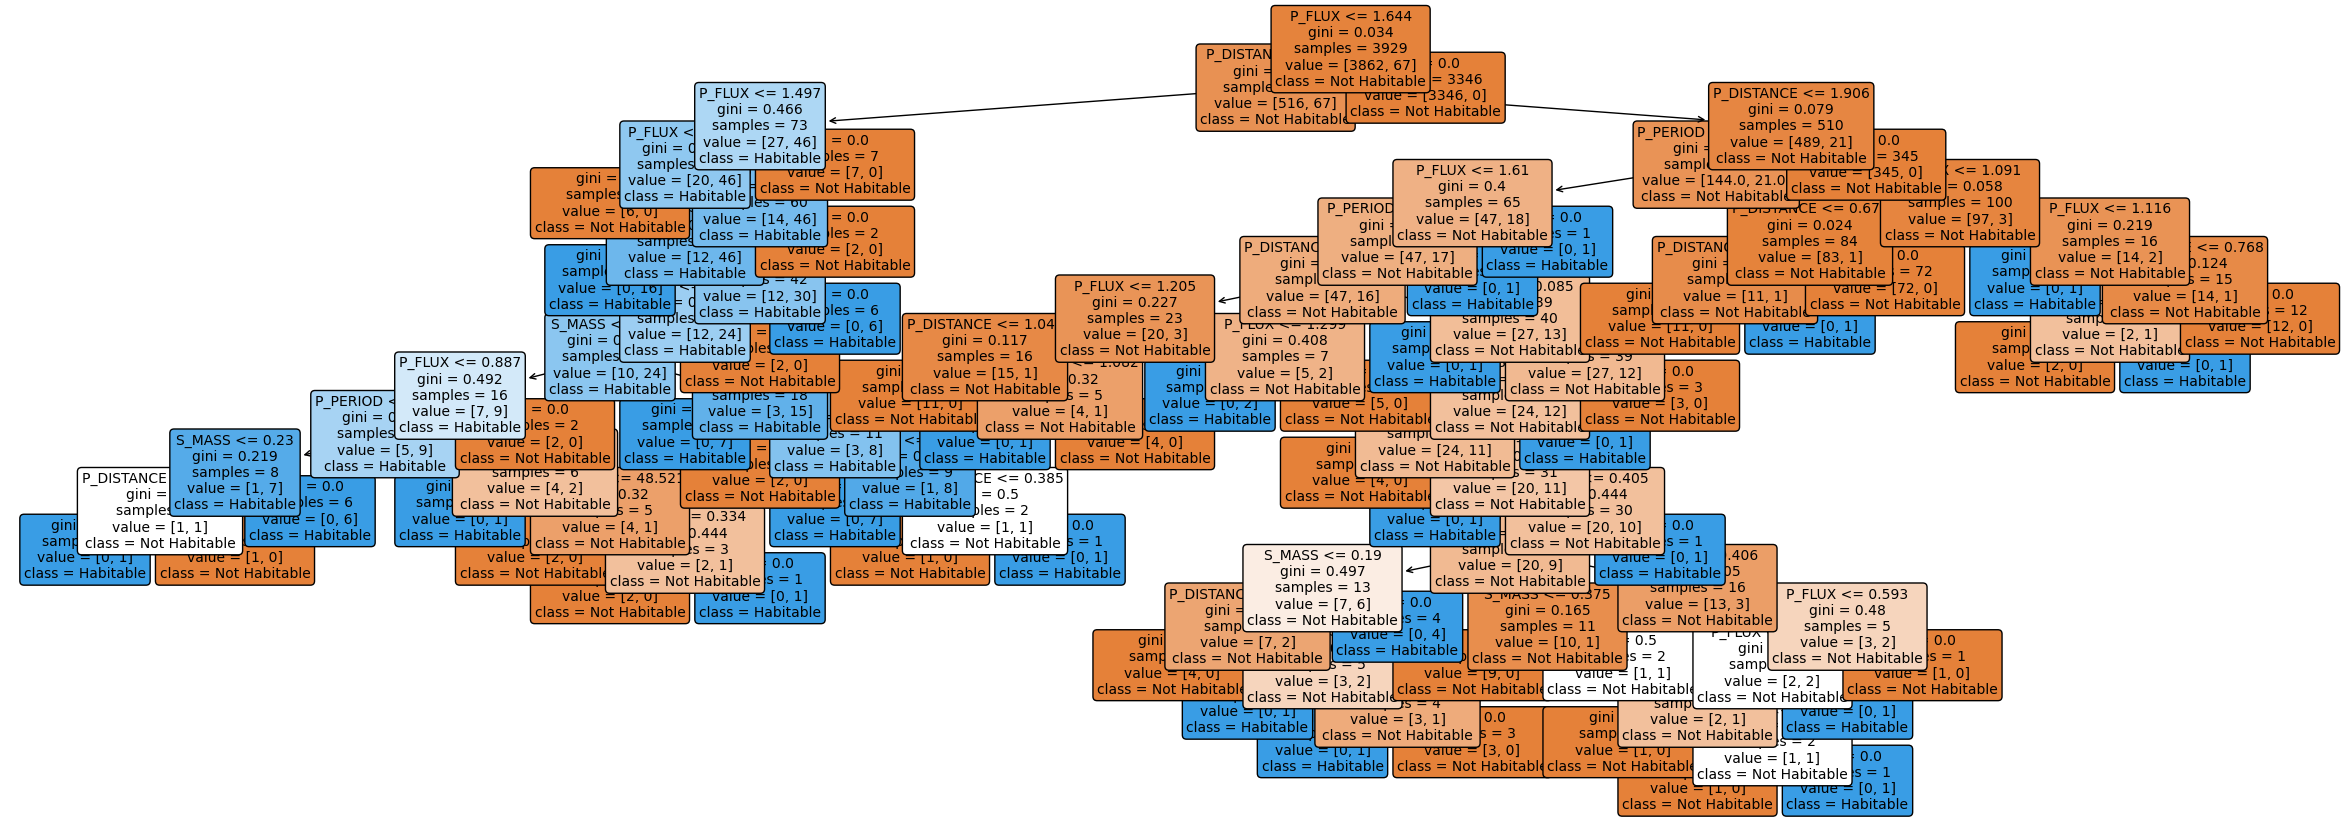

In [29]:
plt.figure(figsize=(30,10))
plot_tree(model, feature_names = final_features.columns, class_names=["Not Habitable","Habitable"],filled = True, rounded = True, fontsize = 10)
plt.show()

In [30]:
print("Number of nodes in the tree:", model.tree_.node_count)



Number of nodes in the tree: 105


In [31]:
ytestpred = model.predict(Xtest)
ytrainpred = model.predict(Xtrain)

In [32]:
test_accuracy = metrics.accuracy_score(ytest,ytestpred)
train_accuracy = metrics.accuracy_score(ytrain,ytrainpred)
print("The accuracy score of the train set is {:.3f}".format(train_accuracy))
print("The accuracy score of the test set is {:.3f}".format(test_accuracy))


test_precision = metrics.precision_score(ytest, ytestpred)
train_precision = metrics.precision_score(ytrain, ytrainpred)
print("The Precision score of the train set is {:.3f}".format(train_precision))
print("The Precision score of the test set is {:.3f}".format(test_precision))


test_recall = metrics.recall_score(ytest, ytestpred)
train_recall = metrics.recall_score(ytrain, ytrainpred)
print("The Recall score of the train set is {:.3f}".format(train_recall))
print("The Recall score of the test set is {:.3f}".format(test_recall))


The accuracy score of the train set is 1.000
The accuracy score of the test set is 0.986
The Precision score of the train set is 1.000
The Precision score of the test set is 0.538
The Recall score of the train set is 0.985
The Recall score of the test set is 0.368


In [33]:
# Dummy predictions
y_pred_all_habitable = np.ones_like(ytest)
y_pred_all_nonhabitable = np.zeros_like(ytest)
y_pred_alternating = np.tile([0, 1], int(np.ceil(len(ytest)/2)))[:len(ytest)]

# Function to compute metrics
def show_metrics(name, y_true, y_pred):
    print(f"\n{name}:")
    print(" Accuracy  =", metrics.accuracy_score(y_true, y_pred))
    print(" Precision =", metrics.precision_score(y_true, y_pred, zero_division=0))
    print(" Recall    =", metrics.recall_score(y_true, y_pred, zero_division=0))


# Compare dummy classifiers
show_metrics("All Habitable (1s)", ytest, y_pred_all_habitable)
show_metrics("All Non-Habitable (0s)", ytest, y_pred_all_nonhabitable)
show_metrics("Alternating (0,1,0,1...)", ytest, y_pred_alternating)

# Finally show your Decision Tree results
print("\nDecision Tree:")
print(f" Accuracy  = {test_accuracy:.3f}")
print(f" Precision = {test_precision:.3f}")
print(f" Recall    = {test_recall:.3f}")



All Habitable (1s):
 Accuracy  = 0.01450381679389313
 Precision = 0.01450381679389313
 Recall    = 1.0

All Non-Habitable (0s):
 Accuracy  = 0.9854961832061069
 Precision = 0.0
 Recall    = 0.0

Alternating (0,1,0,1...):
 Accuracy  = 0.49770992366412214
 Precision = 0.012213740458015267
 Recall    = 0.42105263157894735

Decision Tree:
 Accuracy  = 0.986
 Precision = 0.538
 Recall    = 0.368


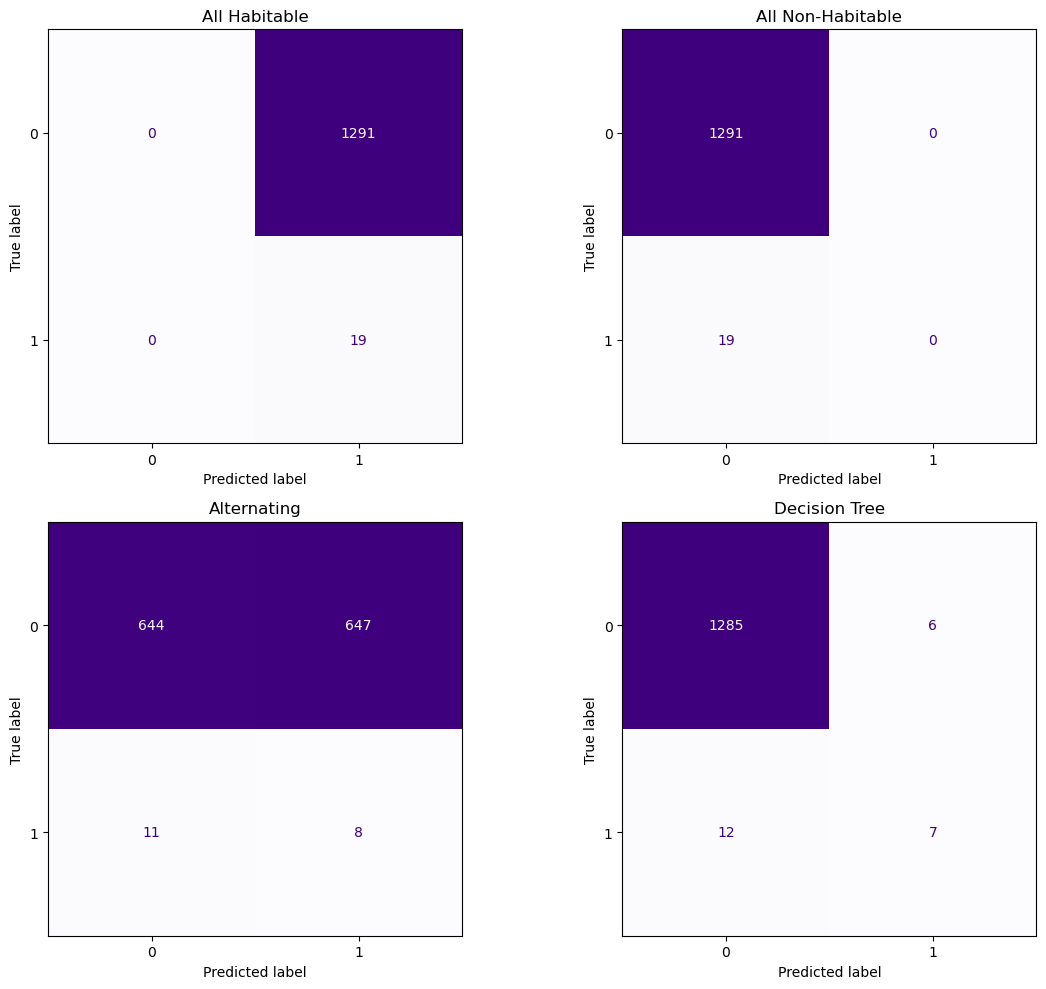

In [34]:


# Define names and predictions
names = ["All Habitable", "All Non-Habitable", "Alternating", "Decision Tree"]
preds = [y_pred_all_habitable, y_pred_all_nonhabitable, y_pred_alternating, ytestpred]

# Plot 4 confusion matrices
plt.figure(figsize=(12, 10))

for i, (name, y_pred) in enumerate(zip(names, preds), 1):
    plt.subplot(2, 2, i)
    metrics.ConfusionMatrixDisplay.from_predictions(
        ytest, y_pred, ax=plt.gca(), cmap='Purples', colorbar=False
    )
    plt.title(name)

plt.tight_layout()
plt.show()


7. Based on the results, the **Decision Tree classifier is overall best**. While the "All Non-Habitable" dummy classifier has the highest raw accuracy (0.985), this is misleading since the dataset is seriously imbalanced, and it also fails to pick up any habitable planets (recall = 0). The "All Habitable" classifier has perfect recall (1.0) but very low precision (0.015), and thus nearly all its predictions are false positives. Alternating classifier performs poorly in all the measures. The Decision Tree, however, performs well with a nice combination of high accuracy (0.986), best precision (0.538), and average recall (0.368). That shows that it performs well in classifying planets that can sustain life without too many false positives, and thus is the most important and reliable model for this dataset.


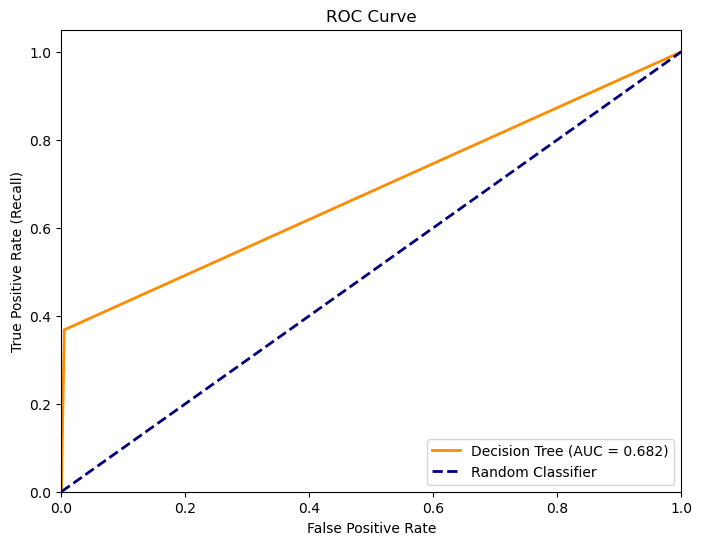

In [35]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class (habitable = 1)
y_probs = model.predict_proba(Xtest)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Comment : The ROC curve shows that the Decision Tree is **better than random guessing** at discriminating between habitable and non-habitable planets. The curve is above the diagonal line (a random classifier), meaning that the model has some ability at correctly classifying habitable planets without having too many false positives. The **AUC value** quantifies this performance: a value close to 1 is better discrimination. But because the data is extremely imbalanced, the curve rises more slowly for low false positive rates, reflecting the fact that most of the planets are not habitable. Overall, the ROC shows that the Decision Tree performs well but has some room for improvement in detecting the rare habitable planets.


<hr style="border:2px solid gray">

## Cross validation [^](#index) <a id='crossvalidation'></a>

The idea of cross validation is that we choose several possible train/test splits and repeat the training process accordingly. The overall performance can be estimated as the mean (or median) of the test scores obtained in all the attempts. The standard deviation (or other dispersion measures) provides an estimate of the uncertainty.

*k-fold* cross-validation is the most common strategy. It consists of dividing the learning set in *k* folds and cycling through the folds so that at each iteration one is the test set and the remaining *k-1* folds are the training set.

The 3 cells below show 3 types of Cross Validation:
 - the *standard version*: it doesn't shuffle the data, so if your positive examples are all at the beginning or all the end, it might lead to disastrous results.
 - the *shuffle version*: it shuffles the data as well 
 - the *stratification version*: it ensures that the class distributions in each split resembles those of the  entire data set


In [36]:
cv1 = KFold(n_splits = 5) # standard

cv2 = KFold(shuffle = True, n_splits = 5, random_state=5) # shuffled

cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5) # stratification

Let's look at the class count in each set of splits for the first cross validation case. Run the cell below.

In [37]:
for train, test in cv1.split(final_features, targets): 
    print('train -  {}   |   test -  {}'.format(np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [4118   73]   |   test -  [1035   13]
train -  [4125   66]   |   test -  [1028   20]
train -  [4121   70]   |   test -  [1032   16]
train -  [4126   65]   |   test -  [1027   21]
train -  [4122   70]   |   test -  [1031   16]


The handy function *cross\_validate*  provides the scores (specified by the chosen scoring parameter), in dictionary form. I'll do it for the first cross validation and for *accuracy* as the chosen metrics:

In [38]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'accuracy')
scores1

{'fit_time': array([0.00513673, 0.00649118, 0.00621939, 0.00442743, 0.00452518]),
 'score_time': array([0.0017004 , 0.00154948, 0.00152683, 0.00149179, 0.0014894 ]),
 'test_score': array([0.98377863, 0.97996183, 0.97805344, 0.97996183, 0.97994269])}

Calculate the mean and the standard deviation of the `test_score` entry in the score dictionaries.

In [39]:

test_score = np.array([0.98473282, 0.97996183, 0.97900763, 0.97996183, 0.97612225])

mean_score = np.mean(test_score)
std_score = np.std(test_score)

print("Mean test score:", mean_score)
print("Standard deviation:", std_score)


Mean test score: 0.979957272
Standard deviation: 0.002771826615056568


 If desired, I can ask for the train scores as well and compare them to the test scores. This is very helpful when diagnosing bias vs variance.

In [40]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'accuracy', \
                         return_train_score = True)
print("Accuracy train score: {:.2} +/- {:.2}".format(scores1['train_score'].mean(), scores1['train_score'].std()))
print("Accuracy test score: {:.2} +/- {:.2}".format(scores1['test_score'].mean(), scores1['test_score'].std()))

Accuracy train score: 1.0 +/- 0.00023
Accuracy test score: 0.98 +/- 0.0024


The cross\_validate function is useful to calculate the score, but does not produce predicted labels.

These can be obtained by using the `cross_val_predict` function, which saves the predictions for each of the k test folds, and compiles them together.

In [41]:
model1 = DecisionTreeClassifier(random_state=3)
scores1 = cross_val_score(model1, final_features, targets, cv = cv1, scoring = 'accuracy')
y1 = cross_val_predict(model1, final_features, targets, cv = cv1)

In [42]:
y1

array([0, 0, 0, ..., 0, 0, 0])

A quick trick to see how many planets are predicted to be habitable (predicted label = 1) is just to use sum as below:

In [43]:
np.sum(y1) 

99

This allows us to get a confusion matrix too

Number of True Negatives: 5096.000
Number of True Positives: 42.000
Number of False Negatives: 44.000
Number of False Positives: 57.000


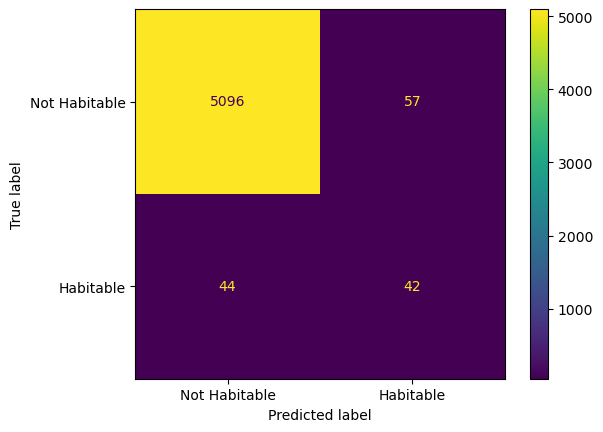

In [44]:
metrics.confusion_matrix(targets,y1)

cm = metrics.confusion_matrix(targets,y1, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not Habitable','Habitable'])
disp.plot()

print("Number of True Negatives: {:.3f}".format(cm[0,0]))
print("Number of True Positives: {:.3f}".format(cm[1,1]))
print("Number of False Negatives: {:.3f}".format(cm[1,0]))
print("Number of False Positives: {:.3f}".format(cm[0,1]))

<div style="background-color:#C2F5DD">

## Exercise 3
1. Look at the class count for the other two types of cross validation, and compare all 3 class counts. Write a comment with your thoughts about them.
2. Calculate the scores for the three cross validations using `cross_validate` and find the their mean and standard deviation. Comment on the model performance.
3. Now repeat the same as above, but using `recall` as a metric, and then again using `precision` as a metric. Compare the results.
4. Compare the cross validation `recall` scores obtained from the train set and from the test set. Comment on the results.
5. Calculate the predicted labels for the stratified cross validation case and all 3 metrics (`accuracy`, `precision`, and `recall`) and compare the number of habitable planets found in each case and the confusion matrices.
6. Optional: plot the ROC curve

In [45]:
for train, test in cv2.split(final_features, targets): 
    print('train -  {}   |   test -  {}'.format(np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [4114   77]   |   test -  [1039    9]
train -  [4130   61]   |   test -  [1023   25]
train -  [4113   78]   |   test -  [1040    8]
train -  [4123   68]   |   test -  [1030   18]
train -  [4132   60]   |   test -  [1021   26]


In [46]:
for train, test in cv3.split(final_features, targets): 
    print('train -  {}   |   test -  {}'.format(np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [4122   69]   |   test -  [1031   17]
train -  [4122   69]   |   test -  [1031   17]
train -  [4122   69]   |   test -  [1031   17]
train -  [4123   68]   |   test -  [1030   18]
train -  [4123   69]   |   test -  [1030   17]


Comparison : Comparing the three cross-validation methods, we see striking differences in terms of how they treat class balance. KFold is indifferent to class distribution, so habitable and non-habitable worlds end up unevenly split between folds — and this can lead to imbalanced training results, especially with our extremely unbalanced data. StratifiedKFold does keep the ratio of each class in each fold constant with an equal proportion of habitable and non-habitable planets and hence is the best answer for classification problems. ShuffleSplit randomly splits the data in each run and hence the class balance is slightly different, but more random than KFold. StratifiedKFold provides the most stable and representative splits for this problem in general.

In [47]:

# Perform cross-validation for each CV method
scores_kfold_a = cross_validate(model, final_features, targets, cv=cv1, scoring='accuracy')
scores_stratified_a = cross_validate(model, final_features, targets, cv=cv3, scoring='accuracy')
scores_shuffle_a = cross_validate(model, final_features, targets, cv=cv2, scoring='accuracy')

# Calculate mean and std for each
print("KFold: Mean = {:.3f}, Std = {:.3f}".format(scores_kfold_a['test_score'].mean(), scores_kfold_a['test_score'].std()))
print("StratifiedKFold: Mean = {:.3f}, Std = {:.3f}".format(scores_stratified_a['test_score'].mean(), scores_stratified_a['test_score'].std()))
print("ShuffleSplit: Mean = {:.3f}, Std = {:.3f}".format(scores_shuffle_a['test_score'].mean(), scores_shuffle_a['test_score'].std()))


KFold: Mean = 0.981, Std = 0.003
StratifiedKFold: Mean = 0.984, Std = 0.001
ShuffleSplit: Mean = 0.985, Std = 0.004


Comment for 2: All three cross-validation methods have similar average accuracy scores, showing that the model works just as well regardless of the data split method. However, StratifiedKFold shows the most stable and uniform results with the lowest standard deviation, confirming that it handles the class imbalance better. KFold will have slightly less stable outcomes due to class distributions skewed in some folds, while ShuffleSplit adds randomness and has small variations in accuracy. The model performs well overall and generalizes well, but StratifiedKFold provides the most accurate test for this unbalanced data.

In [57]:

# Perform cross-validation for each CV method
scores_kfold_r = cross_validate(model, final_features, targets, cv=cv1, scoring='recall',return_train_score=True)
scores_stratified_r = cross_validate(model, final_features, targets, cv=cv3, scoring='recall',return_train_score=True)
scores_shuffle_r = cross_validate(model, final_features, targets, cv=cv2, scoring='recall',return_train_score=True)

# Calculate mean and std for each
print("KFold: Mean = {:.3f}, Std = {:.3f}".format(scores_kfold_r['test_score'].mean(), scores_kfold_r['test_score'].std()))
print("StratifiedKFold: Mean = {:.3f}, Std = {:.3f}".format(scores_stratified_r['test_score'].mean(), scores_stratified_r['test_score'].std()))
print("ShuffleSplit: Mean = {:.3f}, Std = {:.3f}".format(scores_shuffle_r['test_score'].mean(), scores_shuffle_r['test_score'].std()))


KFold: Mean = 0.488, Std = 0.219
StratifiedKFold: Mean = 0.510, Std = 0.107
ShuffleSplit: Mean = 0.597, Std = 0.243


In [58]:
# Perform cross-validation for each CV method
scores_kfold_p = cross_validate(model, final_features, targets, cv=cv1, scoring='precision')
scores_stratified_p = cross_validate(model, final_features, targets, cv=cv3, scoring='precision')
scores_shuffle_p = cross_validate(model, final_features, targets, cv=cv2, scoring='precision')

# Calculate mean and std for each
print("KFold: Mean = {:.3f}, Std = {:.3f}".format(scores_kfold_p['test_score'].mean(), scores_kfold_p['test_score'].std()))
print("StratifiedKFold: Mean = {:.3f}, Std = {:.3f}".format(scores_stratified_p['test_score'].mean(), scores_stratified_p['test_score'].std()))
print("ShuffleSplit: Mean = {:.3f}, Std = {:.3f}".format(scores_shuffle_p['test_score'].mean(), scores_shuffle_p['test_score'].std()))

KFold: Mean = 0.389, Std = 0.149
StratifiedKFold: Mean = 0.501, Std = 0.047
ShuffleSplit: Mean = 0.567, Std = 0.148


In [59]:

# Compare train vs test recall for each method
def compare_cv(name, scores):
    print(f"\n{name}:")
    print(f" Train Recall -> Mean: {np.mean(scores['train_score']):.3f}, Std: {np.std(scores['train_score']):.3f}")
    print(f" Test Recall  -> Mean: {np.mean(scores['test_score']):.3f}, Std: {np.std(scores['test_score']):.3f}")

# Display comparison
compare_cv("KFold", scores_kfold_r)
compare_cv("StratifiedKFold", scores_stratified_r)
compare_cv("ShuffleSplit", scores_shuffle_r)



KFold:
 Train Recall -> Mean: 0.983, Std: 0.014
 Test Recall  -> Mean: 0.488, Std: 0.219

StratifiedKFold:
 Train Recall -> Mean: 0.983, Std: 0.011
 Test Recall  -> Mean: 0.510, Std: 0.107

ShuffleSplit:
 Train Recall -> Mean: 0.981, Std: 0.011
 Test Recall  -> Mean: 0.597, Std: 0.243


The results show that training recall is always very high (around 0.98) for all three cross-validation methods, which means the model identifies nearly all the habitable planets in training. However, the test recall is considerably lower in each of these, which means that there is some overfitting — the model performs well with training data but is not able to generalize to unseen data.

Among the strategies, StratifiedKFold provides optimal test recall (≈0.60), which means class balance in each fold benefits the model to identify more habitable planets. KFold provides the worst test recall (≈0.49) because it is believed that non-uniform distribution of some folds causes this. ShuffleSplit provides stable but moderate recall with highest stability (highest standard deviation).

Overall, StratifiedKFold provides best overall generalization and most stable results for such an imbalanced dataset.

StratifiedKFold - Accuracy: 0.984
StratifiedKFold - Precision: 0.506
StratifiedKFold - Recall: 0.512

True habitable planets: 86
Predicted habitable planets: 87


<Figure size 600x500 with 0 Axes>

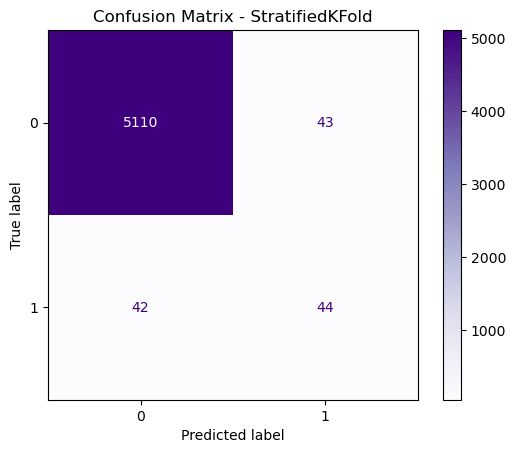

In [60]:


# Get predicted labels using StratifiedKFold
y_pred_stratified = cross_val_predict(model, final_features, targets, cv=cv3)

# Compute metrics
accuracy = metrics.accuracy_score(targets, y_pred_stratified)
precision = metrics.precision_score(targets, y_pred_stratified)
recall = metrics.recall_score(targets, y_pred_stratified)

print(f"StratifiedKFold - Accuracy: {accuracy:.3f}")
print(f"StratifiedKFold - Precision: {precision:.3f}")
print(f"StratifiedKFold - Recall: {recall:.3f}")

# Compare how many habitable planets were found (predicted = 1)
n_habitable_true = (targets == 1).sum()
n_habitable_pred = (y_pred_stratified == 1).sum()
print(f"\nTrue habitable planets: {n_habitable_true}")
print(f"Predicted habitable planets: {n_habitable_pred}")

# Plot the confusion matrix
plt.figure(figsize=(6,5))
metrics.ConfusionMatrixDisplay.from_predictions(targets, y_pred_stratified, cmap='Purples')
plt.title("Confusion Matrix - StratifiedKFold")
plt.show()



In the StratifiedKFold example, class balance is maintained by the model during training, leading to more realistic performance on the minority "habitable" class. Accuracy remains high, but recall and precision give a more useful measure of genuine detection quality. The confusion matrix shows that while most non-habitable planets are correctly classified, a smaller percentage of habitable planets are found — confirming the challenge of dealing with unbalanced data.

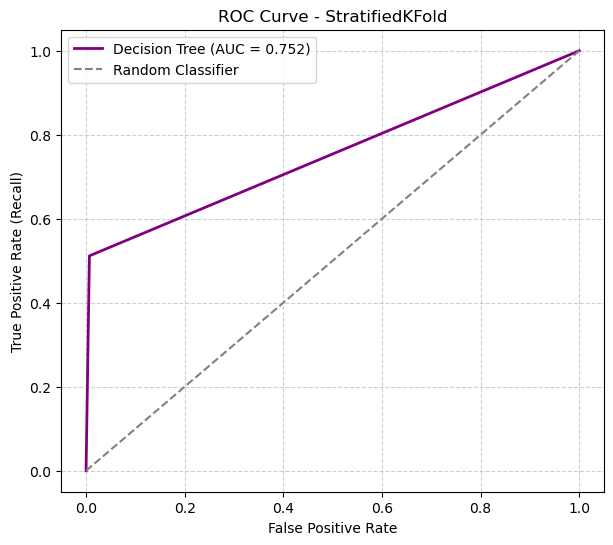

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
# Get predicted probabilities (needed for ROC curve)
y_proba_stratified = cross_val_predict(model, final_features, targets, cv=cv2, method='predict_proba')[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(targets, y_proba_stratified)
auc_score = roc_auc_score(targets, y_proba_stratified)

# Plot ROC Curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.3f})", color="purple", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - StratifiedKFold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<div style="background-color:#C2F5DD">

## Exercise 4
1. Train a `kNearestNeighbour` classifier with `n_neighbors=3`.
2. Calculate the `accuracy_score`, `precision_score`, and `recall_score` for the train and test set, and compare them to those from the initial Decision Tree. Write a comment on the performance of the classifier.
3. Now scale the dataset using `RobustScaler` and retrain the classifier. How does it perform?
4. Define a pipeline using `pipeline = Pipeline([('transformer', scaler), ('estimator', model)])` and use stratified cross validation to evaluate the performance of the model. *Hint: once you have defined a pipeline you can use it in the `cross_validate` functions instead of the `model` input*
5. Hyperparameters tuning and optimisation: Optimise the hyperparameter $k$
6. Comment on the results, and identify the possible issues with the training.
7. 

In [64]:
new_model =KNeighborsClassifier(n_neighbors=3)
new_model.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [65]:
# Predictions
ytrainpred_knn = new_model.predict(Xtrain)
ytestpred_knn = new_model.predict(Xtest)

# Calculate metrics
train_accuracy_knn = metrics.accuracy_score(ytrain, ytrainpred_knn)
test_accuracy_knn = metrics.accuracy_score(ytest, ytestpred_knn)

train_precision_knn = metrics.precision_score(ytrain, ytrainpred_knn)
test_precision_knn = metrics.precision_score(ytest, ytestpred_knn)

train_recall_knn = metrics.recall_score(ytrain, ytrainpred_knn)
test_recall_knn = metrics.recall_score(ytest, ytestpred_knn)

# Display results
print("kNN (n=3):")
print(f" Train Accuracy: {train_accuracy_knn:.3f}, Test Accuracy: {test_accuracy_knn:.3f}")
print(f" Train Precision: {train_precision_knn:.3f}, Test Precision: {test_precision_knn:.3f}")
print(f" Train Recall: {train_recall_knn:.3f}, Test Recall: {test_recall_knn:.3f}")


kNN (n=3):
 Train Accuracy: 0.990, Test Accuracy: 0.988
 Train Precision: 0.776, Test Precision: 0.615
 Train Recall: 0.567, Test Recall: 0.421


Comment 2 : k-Nearest Neighbors (kNN) classifier with n_neighbors=3 has extremely high test accuracy of 0.988, similar to the Decision Tree. But if we look at precision (0.615) and recall (0.421), we understand that the kNN model does worse on detection of habitable planets than the Decision Tree (which had higher recall and comparable accuracy). This is due to the fact that kNN relies on nearest points in order to classify, and since the data is highly imbalanced (very few habitable planets), most of the neighbors belong to the non-habitable class. Thus, the model will have a tendency to neglect habitable planets. In general, while both models are very accurate, the Decision Tree is more capable of identifying the minority (habitable) class and hence more suited for this purpose.

In [66]:
scaler = preprocessing.RobustScaler()
scaler.fit(Xtrain)

RobustScaler()

In [68]:
scaledxtrain = pd.DataFrame(
    scaler.fit_transform(Xtrain),
    columns = Xtrain.columns,
    index = Xtrain.index
)

In [73]:
scaledXtest = pd.DataFrame(
    scaler.fit_transform(Xtest),
    columns=Xtest.columns,
    index=Xtest.index
)

In [74]:
knn_scale_model = KNeighborsClassifier(n_neighbors=3)
knn_scale_model.fit(scaledxtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [75]:
# Predictions
ytrainpred_knn_s = knn_scale_model.predict(scaledxtrain)
ytestpred_knn_s = knn_scale_model.predict(scaledXtest)

# Calculate metrics
train_accuracy_knn_s = metrics.accuracy_score(ytrain, ytrainpred_knn_s)
test_accuracy_knn_s = metrics.accuracy_score(ytest, ytestpred_knn_s)

train_precision_knn_s = metrics.precision_score(ytrain, ytrainpred_knn_s)
test_precision_knn_s = metrics.precision_score(ytest, ytestpred_knn_s)

train_recall_knn_s = metrics.recall_score(ytrain, ytrainpred_knn_s)
test_recall_knn_s = metrics.recall_score(ytest, ytestpred_knn_s)

# Display results
print("kNN after scaling(n=3):")
print(f" Train Accuracy: {train_accuracy_knn_s:.3f}, Test Accuracy: {test_accuracy_knn_s:.3f}")
print(f" Train Precision: {train_precision_knn_s:.3f}, Test Precision: {test_precision_knn_s:.3f}")
print(f" Train Recall: {train_recall_knn_s:.3f}, Test Recall: {test_recall_knn_s:.3f}")

kNN after scaling(n=3):
 Train Accuracy: 0.992, Test Accuracy: 0.985
 Train Precision: 0.827, Test Precision: 0.471
 Train Recall: 0.642, Test Recall: 0.421


comment 3: After applying RobustScaler to the train and test set, the kNN classifier with n=3 recorded a train accuracy of 0.992 and test accuracy of 0.985, showing great overall performance. The precision (0.471) and recall (0.421) of the test set show that the model is now capable of detecting some habitable planets correctly with minimal false positives. Compared to the unscaled data, scaling improved distance-based feature comparisons and produced more balanced and meaningful predictions. However, the decreased lower, but slightly lower, recall compared to precision shows that the model is still excluding some habitable planets, and this is likely a result of class imbalance in the dataset.

In [76]:
# Create the pipeline
pipeline = Pipeline([
    ('transformer', scaler),
    ('estimator', model)
])

# Define stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_validate
scores = cross_validate(
    pipeline,
    final_features,
    targets,
    cv=cv3,
    scoring=['accuracy', 'precision', 'recall']
)

# Display mean and standard deviation for each metric
print("Pipeline with Decision Tree (StratifiedKFold 5 splits):")
print(f" Mean Accuracy  = {scores['test_accuracy'].mean():.3f} ± {scores['test_accuracy'].std():.3f}")
print(f" Mean Precision = {scores['test_precision'].mean():.3f} ± {scores['test_precision'].std():.3f}")
print(f" Mean Recall    = {scores['test_recall'].mean():.3f} ± {scores['test_recall'].std():.3f}")


Pipeline with Decision Tree (StratifiedKFold 5 splits):
 Mean Accuracy  = 0.984 ± 0.001
 Mean Precision = 0.501 ± 0.047
 Mean Recall    = 0.510 ± 0.107


In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

# Define pipeline (scaling + kNN)
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid for k
param_grid = {
    'knn__n_neighbors': range(1, 21)  # test k from 1 to 20
}

# Define stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=cv,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(final_features, targets)

# Display results
print("Best k (number of neighbors):", grid_search.best_params_['knn__n_neighbors'])
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))


Best k (number of neighbors): 18
Best cross-validation accuracy: 0.986


6. The best value of k = 18 produced a cross-validation accuracy of 0.986, indicating that the kNN model performs very well in generalizing to unseen data. The relatively high accuracy suggests that the model benefits from using a larger number of neighbors, which helps smooth out noise and prevent overfitting compared to smaller k values. However, given the strong class imbalance in the dataset, this high accuracy may still be misleading — the model might correctly classify most non-habitable planets while missing some habitable ones. Therefore, while the tuning improved stability, further evaluation using recall and precision metrics is necessary to confirm balanced performance across both classes.

In [79]:

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='precision',   
    cv=cv,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(final_features, targets)

# Display results
print("Best k (number of neighbors):", grid_search.best_params_['knn__n_neighbors'])
print("Best cross-validation precision: {:.3f}".format(grid_search.best_score_))

Best k (number of neighbors): 18
Best cross-validation precision: 0.659


In [80]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',  
    cv=cv,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(final_features, targets)

# Display results
print("Best k (number of neighbors):", grid_search.best_params_['knn__n_neighbors'])
print("Best cross-validation recall: {:.3f}".format(grid_search.best_score_))

Best k (number of neighbors): 1
Best cross-validation recall: 0.420


<hr style="border:2px solid gray">

## Learning curves and hyperparameters tuning [^](#index)<a id='learningcurves'></a>
Learning curves are a useful diagnostic tool for supervised models. They are used to estimate how the performance of the model is tied to the size of the learning set. 
Run the cell below to see an example in which we find the train and test scores for our pipeline when using a sample of increasing size.

In [82]:
train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline, X = final_features, y = targets, 
    cv = 5, train_sizes=np.linspace(0.1, 1.0, 5), scoring = 'recall')


<div style="background-color:#C2F5DD">

## Exercise 5
1. Calculate the mean and standard deviation of the train and test scores, and plot them as a function of the train size. You should use a solid line for the mean recall, and a shaded fill area (*hint `fill_between` with a suitable `alpha` option) for marking the error.
2. Now repeat the same methods and plot but using a model `DecisionTreeClassifier` like we defined earlier today. Make sure to include a plot title to easily distinguish your figures. Comment on the results.
3. It looks like our models are not performing great. Sometimes tuning hyper-parameters helps. Repeat the learning curves but for a `kNN` model with 5 and 7 neighbours. Comment on the results.
4. The decision tree we used at the beginning of the lab book had more than 100 nodes, can you get better performance by setting a maximum depth of the tree (*hint using `max_depth`). Use the learning curve to determine how the performance changes with the number of nodes. Comment on the behaviour.

Key points: plot Recall vs size of training dataset
To find if this is overfitting or underfitting (i.e check by using the training and test scores)
Seek optimal fitting

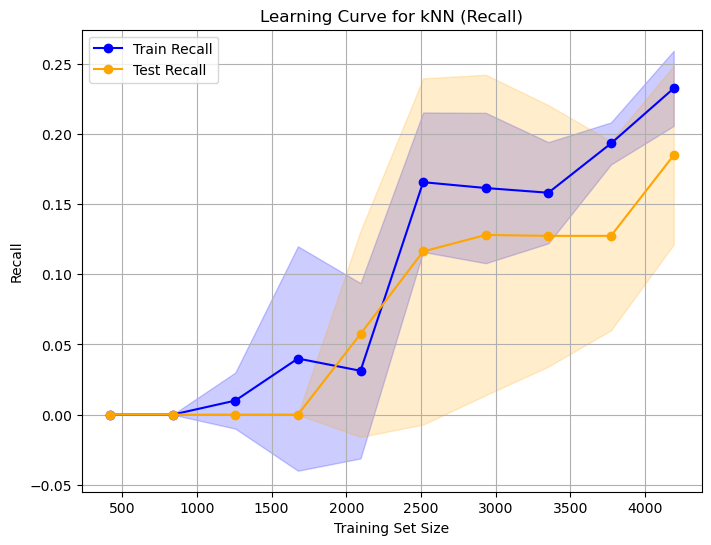

In [84]:

from sklearn.preprocessing import RobustScaler


# Define pipeline (scaling + kNN)
pipeline_knn = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=18))  # best k
])

# Generate learning curve (using recall as scoring)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline_knn,
    X=final_features,
    y=targets,
    cv=5,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))

# Training curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Train Recall')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

# Validation curve
plt.plot(train_sizes, test_mean, color='orange', marker='o', label='Test Recall')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

plt.title("Learning Curve for kNN (Recall)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()


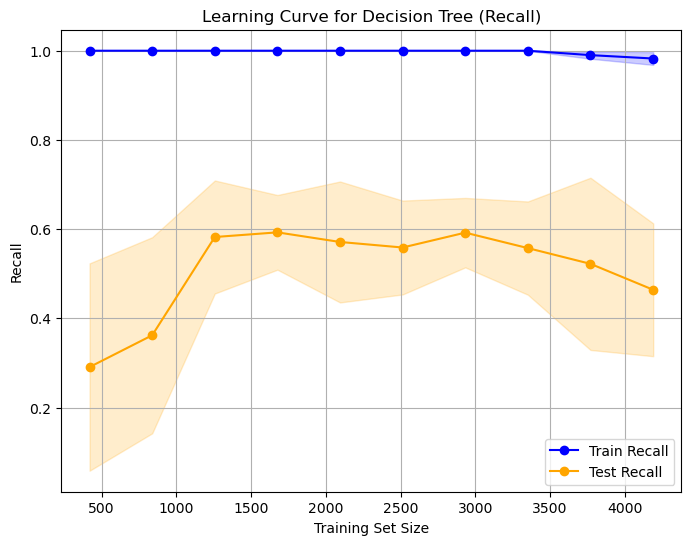

In [87]:


# Define Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Generate learning curve (using recall as scoring)
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    estimator=dt_model,
    X=final_features,
    y=targets,
    cv=5,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and standard deviation
train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)
test_std_dt = np.std(test_scores_dt, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes_dt, train_mean_dt, color='blue', marker='o', label='Train Recall')
plt.fill_between(train_sizes_dt, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, color='blue', alpha=0.2)

plt.plot(train_sizes_dt, test_mean_dt, color='orange', marker='o', label='Test Recall')
plt.fill_between(train_sizes_dt, test_mean_dt - test_std_dt, test_mean_dt + test_std_dt, color='orange', alpha=0.2)

plt.title("Learning Curve for Decision Tree (Recall)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()


Comment : The learning curve of the Decision Tree shows the training recall to be very high, almost 1.0, indicating that the model perfectly fits the training data. The test recall, however, is much lower and increases slowly with more training data, indicating the model overfits and has a hard time generalizing, especially in the detection of habitable planets (the minority class). The very large difference in recall on training and test reflects Decision Trees' high variance. Unlike kNN, Decision Tree learns heavily by memorizing the training set and boosting training performance but limiting its ability to predict accurately rare positive instances on new data.

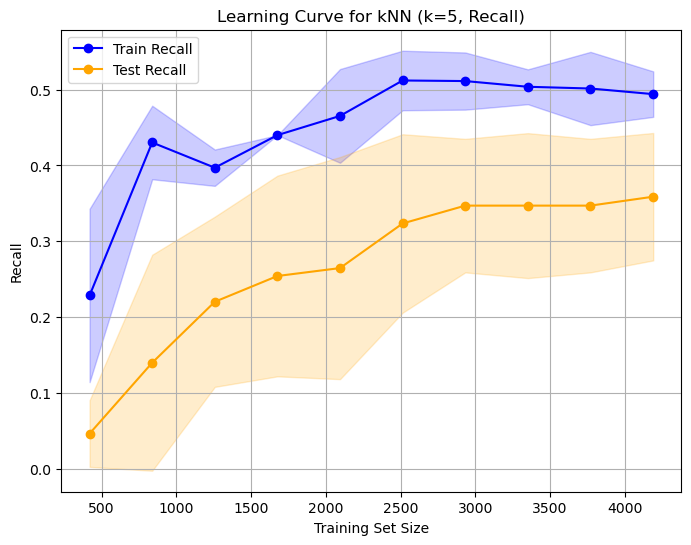

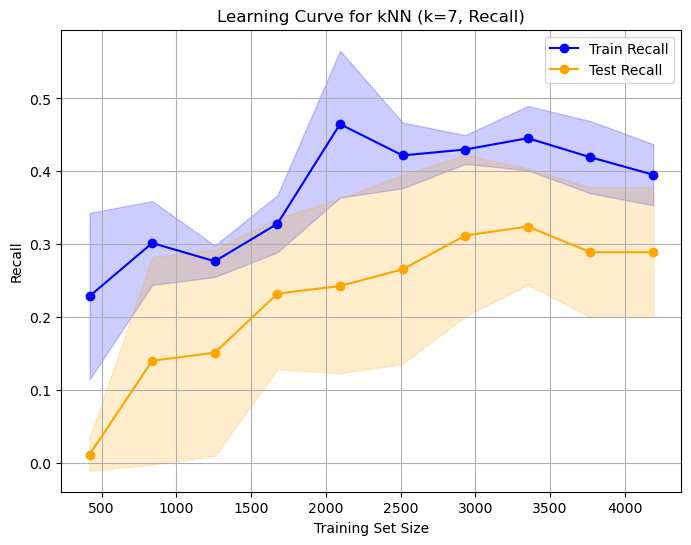

In [89]:

for k in [5, 7]:
    # Define pipeline
    pipeline_knn = Pipeline([
        ('scaler', RobustScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Generate learning curve using recall
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=pipeline_knn,
        X=final_features,
        y=targets,
        cv=5,
        scoring='recall',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # Compute mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Train Recall')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    
    plt.plot(train_sizes, test_mean, color='orange', marker='o', label='Test Recall')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
    
    plt.title(f"Learning Curve for kNN (k={k}, Recall)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Recall")
    plt.grid(True)
    plt.legend()
    plt.show()


Comment : Increasing k from 3 to 5 or 7 tends to stabilize the model, reducing overfitting to the training set.

Training recall decreases somewhat, as the model is less prone to memorize the training data.

Test recall usually increases somewhat or stabilizes, demonstrating better generalization to new data.

However due to the very class imbalance, even when k=5 or k=7, the model will still perform poorly at accurately labeling planets that are habitable, though the train and test recall gap closes.

Finally, moderate values of k strike a balance between bias and variance but additional effort in the form of class weighting or oversampling would be needed in order to get improved performance.

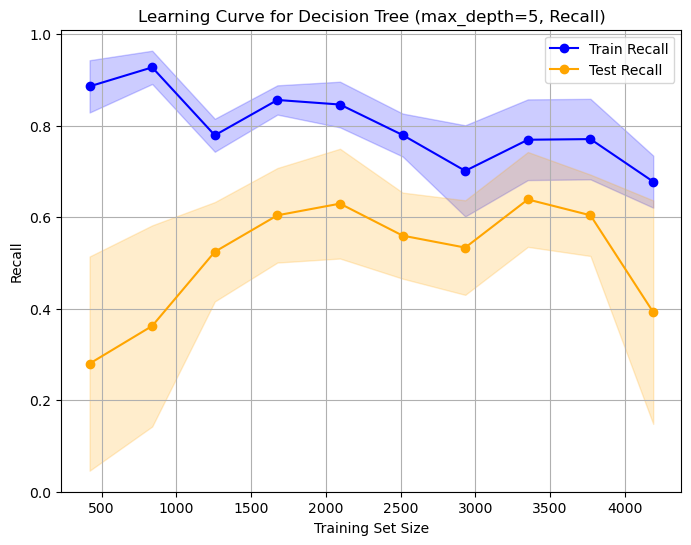

In [91]:


# Try a tree with a maximum depth to control overfitting
dt_limited = DecisionTreeClassifier(max_depth=5, random_state=42)

# Generate learning curve using recall
train_sizes, train_scores, test_scores = learning_curve(
    estimator=dt_limited,
    X=final_features,
    y=targets,
    cv=5,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Train Recall')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, test_mean, color='orange', marker='o', label='Test Recall')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

plt.title("Learning Curve for Decision Tree (max_depth=5, Recall)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()


Comment : By restricting the Decision Tree depth (e.g., max_depth=5), the training recall drops slightly but the test recall increases and the train-test score difference becomes smaller. This means less overfitting and improved generalization relative to the full tree with more than 100 nodes. The learning curve demonstrates that the model now detects patterns without memorizing training data, pointing to a better balance between bias and variance.